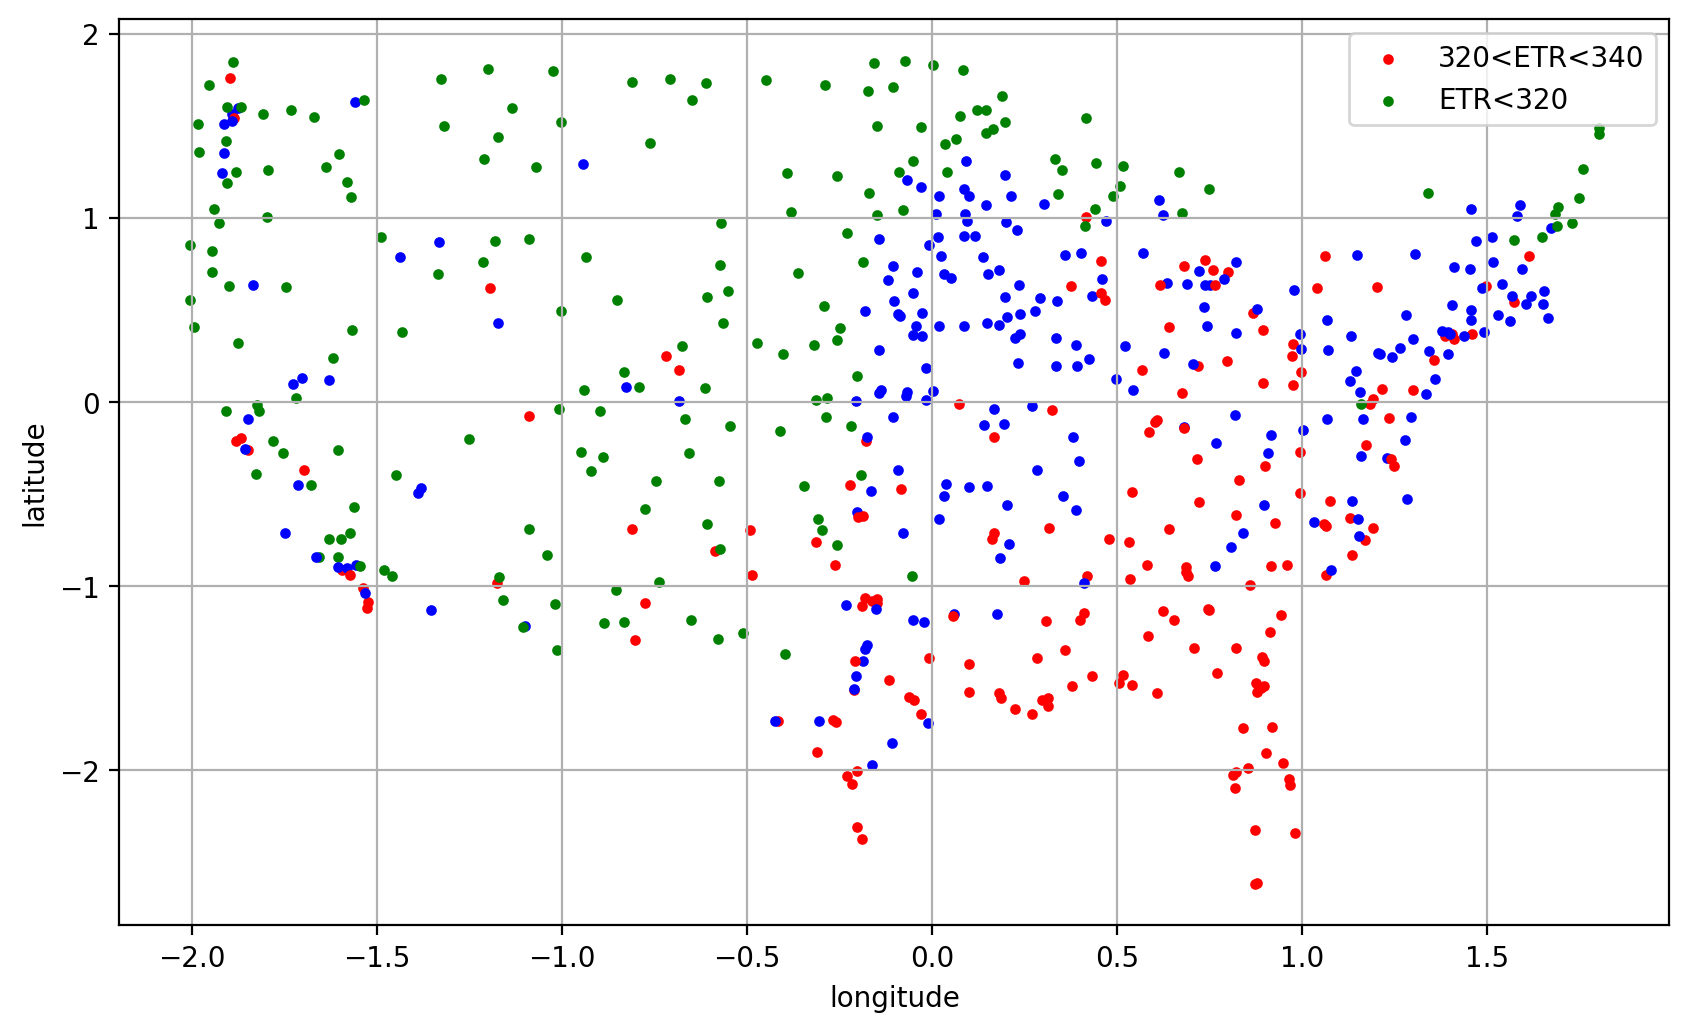

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("dataCollection.csv")

number = data['USAF'].values
latitude = data['Latitude'].values
longitude = data['Longitude'].values
etr = data['Avg hourly ETR in 2005 (Wh/m^2)'].values
metstat = data['Avg hourly METSTAT in 2005 (Wh/m^2)'].values
length = number.size
train_length = 600
test_length = length - train_length
classes = np.empty(length,dtype=int)

#shuffle and pick train set and test set


#standard normalization
var_x = np.var(longitude)
var_y = np.var(latitude)

mean_x = np.mean(longitude)
mean_y = np.mean(latitude)

x_norm = (longitude - mean_x)/np.sqrt(var_x)
y_norm = (latitude - mean_y)/np.sqrt(var_y)

# for i in range(length):
#     if etr[i] < 320:
#         classes[i]=0
#     elif 320 < etr[i] < 340:
#         classes[i]=1
#     else:
#         classes[i]=2

for i in range(length):
    if metstat[i] < 60:
        classes[i]=0
    elif 60 <= metstat[i] < 70:
        classes[i]=1
    else:
        classes[i]=2

#
# print('amount:')
# print(etr[classes==0].size)
# print(etr[classes==1].size)
# print(etr[classes==2].size)
#
# print('mean:')
# print(np.mean(etr[classes==0]))
# print(np.mean(etr[classes==1]))
# print(np.mean(etr[classes==2]))
#
# print('variance:')
# print(np.var(etr[classes==0]))
# print(np.var(etr[classes==1]))
# print(np.var(etr[classes==2]))

colors = ['g','b','r']


plt.figure(figsize=(10,6),dpi=200)
# plt.xlim(-140, -60)
# plt.ylim(20, 60)
plt.grid(1)
plt.xlabel('longitude')
plt.ylabel('latitude')
qwe ={}
qwe[0]= 'ETR>340'
qwe[1]= 'ETR<320'
qwe[2]= '320<ETR<340'

for target in range(600):
    plt.scatter(x_norm[target], y_norm[target], c=colors[classes[target]],s=8,label = qwe[classes[target]])
# for target in range(600,925):
#     plt.scatter(x_norm[target], y_norm[target], c=colors[classes[target]],s=8,label = qwe[classes[target]],alpha=0.2)

plt.legend(['320<ETR<340','ETR<320'])
#
# plt.figure(figsize=(10,6),dpi=200)
# plt.grid(1)
# plt.xlabel('longitude')
# plt.ylabel('latitude')
# plt.scatter(x_norm[:600],y_norm[:600],s=8,c='r')
# plt.scatter(x_norm[600:],y_norm[600:],s=8,c='b',alpha=0.2)
#plt.legend(qwe[0],qwe[1],qwe[2])
#plt.legend(['ETR>340'],c = 'g',['ETR<320'],c ='b',['320<ETR<340'],c ='r')
##plt.legend(['ETR>340','ETR<320','320<ETR<340'],c = 'g')
#plt.legend(['ETR<320'])
#plt.legend(['320<ETR<340'])